In [353]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [354]:
df=pd.read_excel(r"C:\Users\user\Downloads\archive\Data_Train.xlsx")

In [355]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [356]:
df.shape

(10683, 11)

In [357]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [358]:
df.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897


In [359]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [360]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')

In [361]:
df["Journey_day"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day

In [362]:
df["Journey_Month"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.month

In [363]:
df["Journey_Year"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.year

In [364]:
df['Journey_Weekday'] = pd.Series(df['Date_of_Journey']).dt.day_name()

In [365]:
df.drop(columns="Date_of_Journey",inplace=True)

In [366]:
df.sample()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Journey_Year,Journey_Weekday
7971,Air India,Delhi,Cochin,DEL → AMD → BOM → COK,05:00,07:40 13 Jun,26h 40m,2 stops,No info,10231,12,6,2019,Wednesday


In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Journey_day      10683 non-null  int64 
 11  Journey_Month    10683 non-null  int64 
 12  Journey_Year     10683 non-null  int64 
 13  Journey_Weekday  10683 non-null  object
dtypes: int64(4), object(10)
memory usage: 1.1+ MB


In [368]:
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])
df['Dep_Time'] = df['Dep_Time'].dt.strftime('%H:%M:%S')
df['Arrival_Time'] = df['Arrival_Time'].dt.strftime('%H:%M:%S')

In [369]:
df['Dep_Hr']=df['Dep_Time'].str.slice(0, 2)

In [370]:
df['Arrival_Hr']=df['Arrival_Time'].str.slice(0, 2)

In [371]:
df.drop(columns=['Dep_Time','Arrival_Time'],inplace=True)

In [372]:
# Changing Duration feature from HH:MM to total minutes
hour = pd.to_numeric(df['Duration'].str.replace(r'\D+', ' ', regex=True).str.split(' ').str[0])*60
mins = pd.to_numeric(df['Duration'].str.replace(r'\D+', ' ', regex=True).str.split(' ').str[1])

# some rows dont have mins. hence will become NaN if add hr and min columns tgt. 
df['Duration_min'] = np.where(mins.isnull(), hour, hour + mins )

# chaning total_stops to numeric
df.drop(df.index[9039], inplace=True)
df["Total_Stops"] = np.where(df["Total_Stops"] == "non-stop",0,
                         np.where(df["Total_Stops"] == "1 stop",1,
                         np.where(df["Total_Stops"] == "2 stops",2,
                         np.where(df["Total_Stops"] == "3 stops",3,
                         np.where(df["Total_Stops"] == "4 stops",4,0)))))

In [373]:
df.drop(columns="Duration",inplace=True)

In [374]:
df = df.astype({'Dep_Hr':'int32','Arrival_Hr':'int32'})

In [375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10682 non-null  object 
 1   Source           10682 non-null  object 
 2   Destination      10682 non-null  object 
 3   Route            10682 non-null  object 
 4   Total_Stops      10682 non-null  int32  
 5   Additional_Info  10682 non-null  object 
 6   Price            10682 non-null  int64  
 7   Journey_day      10682 non-null  int64  
 8   Journey_Month    10682 non-null  int64  
 9   Journey_Year     10682 non-null  int64  
 10  Journey_Weekday  10682 non-null  object 
 11  Dep_Hr           10682 non-null  int32  
 12  Arrival_Hr       10682 non-null  int32  
 13  Duration_min     10682 non-null  float64
dtypes: float64(1), int32(3), int64(4), object(6)
memory usage: 1.1+ MB


In [376]:
df.sample()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Journey_Year,Journey_Weekday,Dep_Hr,Arrival_Hr,Duration_min
8704,Air India,Kolkata,Banglore,CCU → BOM → COK → BLR,2,No info,12434,6,5,2019,Monday,16,15,1335.0


In [377]:
df.duplicated().sum()

243

In [378]:
df.drop_duplicates(inplace=True)

In [379]:
df.shape

(10439, 14)

In [380]:
df.isna().sum()

Airline            0
Source             0
Destination        0
Route              0
Total_Stops        0
Additional_Info    0
Price              0
Journey_day        0
Journey_Month      0
Journey_Year       0
Journey_Weekday    0
Dep_Hr             0
Arrival_Hr         0
Duration_min       0
dtype: int64

In [381]:
df.describe()

,Total_Stops,Price,Journey_day,Journey_Month,Journey_Year,Dep_Hr,Arrival_Hr,Duration_min
count,10439.000000,10439.000000,10439.000000,10439.000000,10439.0,10439.000000,10439.000000,10439.000000
mean,0.804100,9035.939362,13.466137,4.702175,2019.0,12.470256,13.379730,630.820960
std,0.660261,4625.680493,8.466494,1.164027,0.0,5.728267,6.855394,500.759159
min,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,75.000000
25%,0.000000,5228.000000,6.000000,3.000000,2019.0,8.000000,8.000000,170.000000
50%,1.000000,8273.000000,12.000000,5.000000,2019.0,11.000000,14.000000,505.000000
75%,1.000000,12349.000000,21.000000,6.000000,2019.0,18.000000,19.000000,910.000000
max,4.000000,79512.000000,27.000000,6.000000,2019.0,23.000000,23.000000,2860.000000


In [382]:
df.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_6028\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Total_Stops,Price,Journey_day,Journey_Month,Journey_Year,Dep_Hr,Arrival_Hr,Duration_min
Total_Stops,1.000000,0.601140,-0.019413,0.038387,NaN,-0.065944,0.053032,0.727526
Price,0.601140,1.000000,-0.159557,-0.113963,NaN,0.006351,0.032217,0.500998
Journey_day,-0.019413,-0.159557,1.000000,-0.038396,NaN,-0.003205,-0.002206,-0.030246
Journey_Month,0.038387,-0.113963,-0.038396,1.000000,NaN,0.041193,0.001160,0.004247
Journey_Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dep_Hr,-0.065944,0.006351,-0.003205,0.041193,NaN,1.000000,-0.004677,0.000062
Arrival_Hr,0.053032,0.032217,-0.002206,0.001160,NaN,-0.004677,1.000000,0.063124
Duration_min,0.727526,0.500998,-0.030246,0.004247,NaN,0.000062,0.063124,1.000000


In [383]:
df.sample(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Journey_Year,Journey_Weekday,Dep_Hr,Arrival_Hr,Duration_min
9919,Jet Airways,Kolkata,Banglore,CCU → BOM → BLR,1,No info,14781,15,5,2019,Wednesday,6,19,800.0


In [384]:
df["Airline"].value_counts()

Jet Airways                          3700
IndiGo                               2022
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               477
Air Asia                              318
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<Axes: >

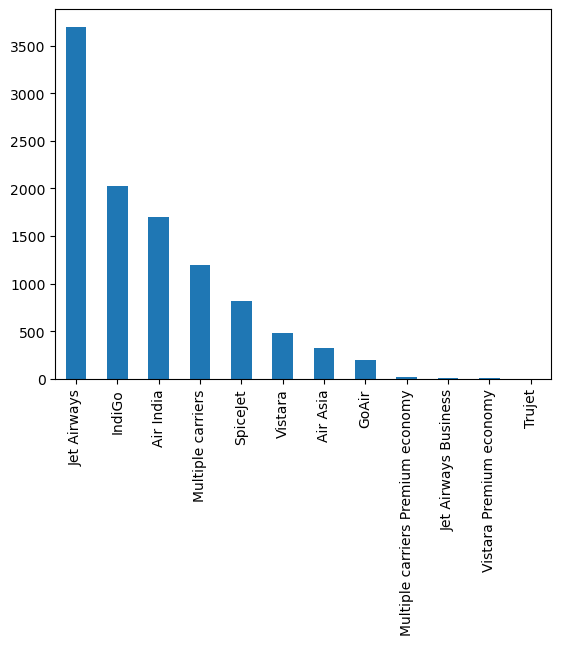

In [385]:
df["Airline"].value_counts().plot(kind="bar")

<Axes: >

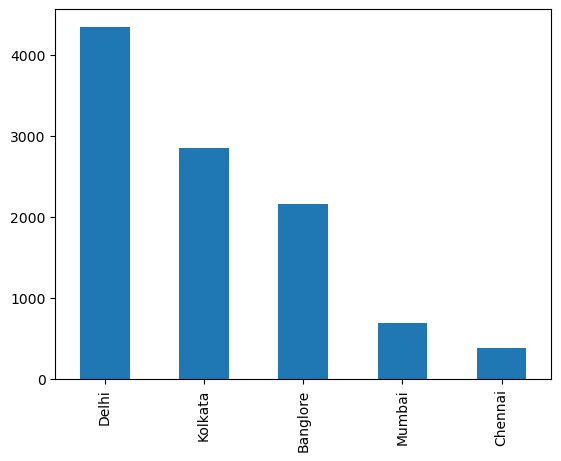

In [386]:
df["Source"].value_counts().plot(kind="bar")

<Axes: >

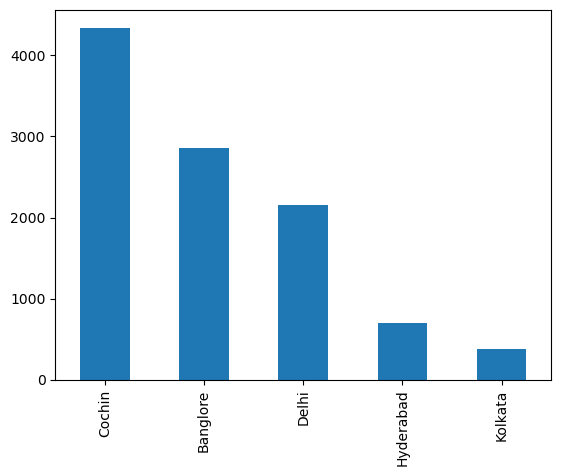

In [387]:
df['Destination'] = df['Destination'].replace('New Delhi' , 'Delhi')
df['Destination'].value_counts().plot(kind = 'bar') 

In [388]:
df['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1516
CCU → BOM → BLR           979
CCU → BLR                 721
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [389]:
df["Duration_min"].value_counts()

170.0     539
90.0      386
165.0     334
155.0     326
175.0     318
         ... 
2185.0      1
1825.0      1
1815.0      1
2525.0      1
2860.0      1
Name: Duration_min, Length: 367, dtype: int64

<Axes: ylabel='Total_Stops'>

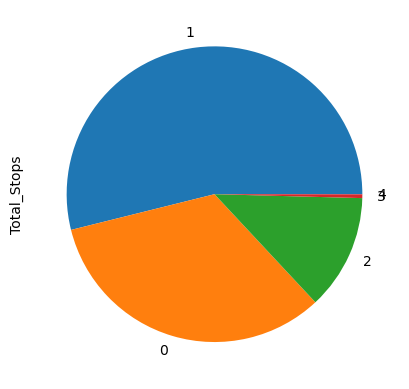

In [390]:
df["Total_Stops"].value_counts().plot(kind="pie",)

<Axes: >

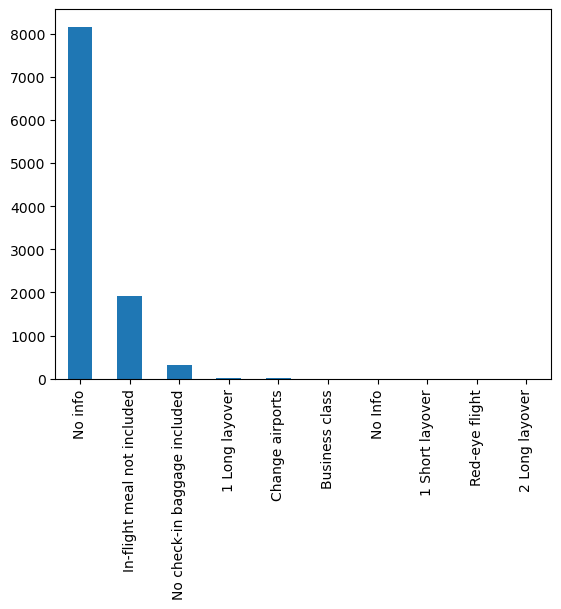

In [391]:
df['Additional_Info'].value_counts().plot(kind="bar")

<Axes: >

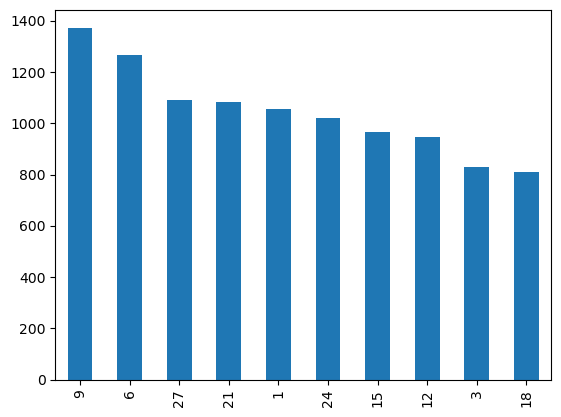

In [392]:
df['Journey_day'].value_counts().plot(kind="bar")

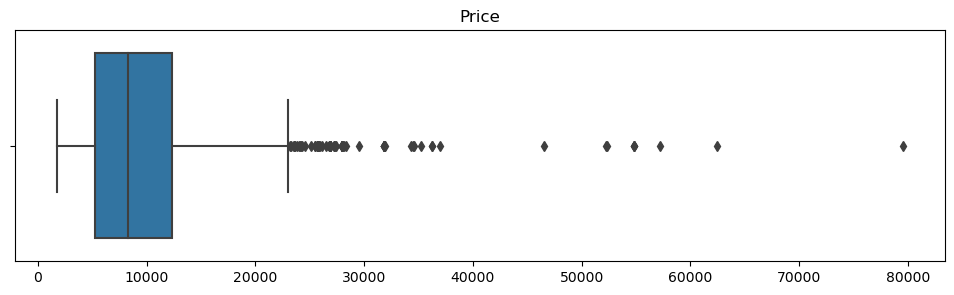

In [393]:
fig,axes=plt.subplots(figsize=(12, 3))
ax = sns.boxplot(x=df['Price'].values).set_title('Price')

<Axes: xlabel='Price', ylabel='Count'>

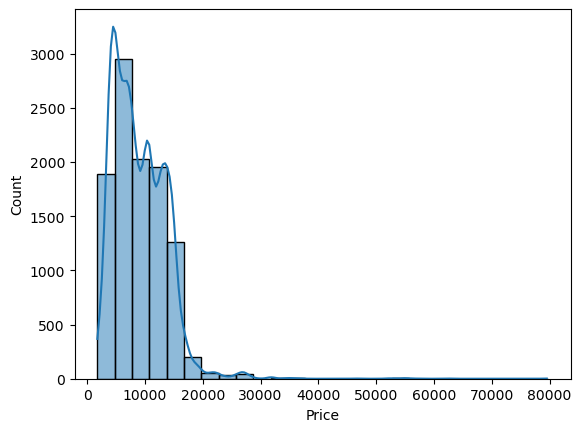

In [394]:
#with outliers
sns.histplot(df['Price'],kde=True,binwidth=3000)

In [395]:
#without outliers
no_outliers = df[df['Price'] < 30000]

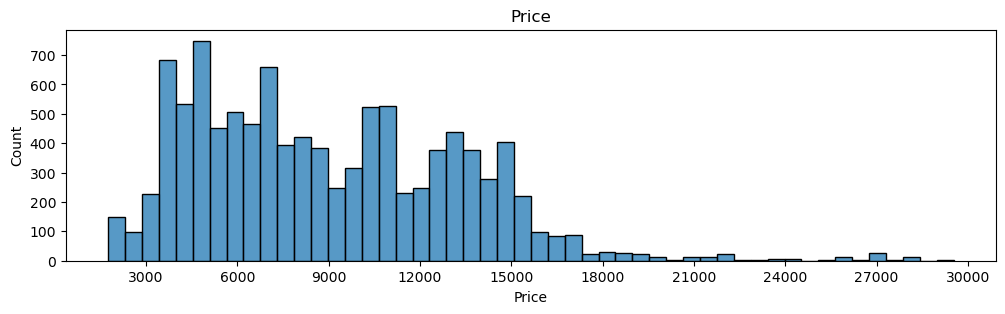

In [396]:
fig,axes=plt.subplots(figsize=(12, 3))
sns.histplot(no_outliers["Price"],bins=50).set_title('Price')
plt.xticks([int(x) for x in np.linspace(start=3000,stop=30000,num=10)])
plt.show()

In [397]:
print("Number of outliers above 30k:", len(df[df['Price'] > 30000]))

Number of outliers above 30k: 24


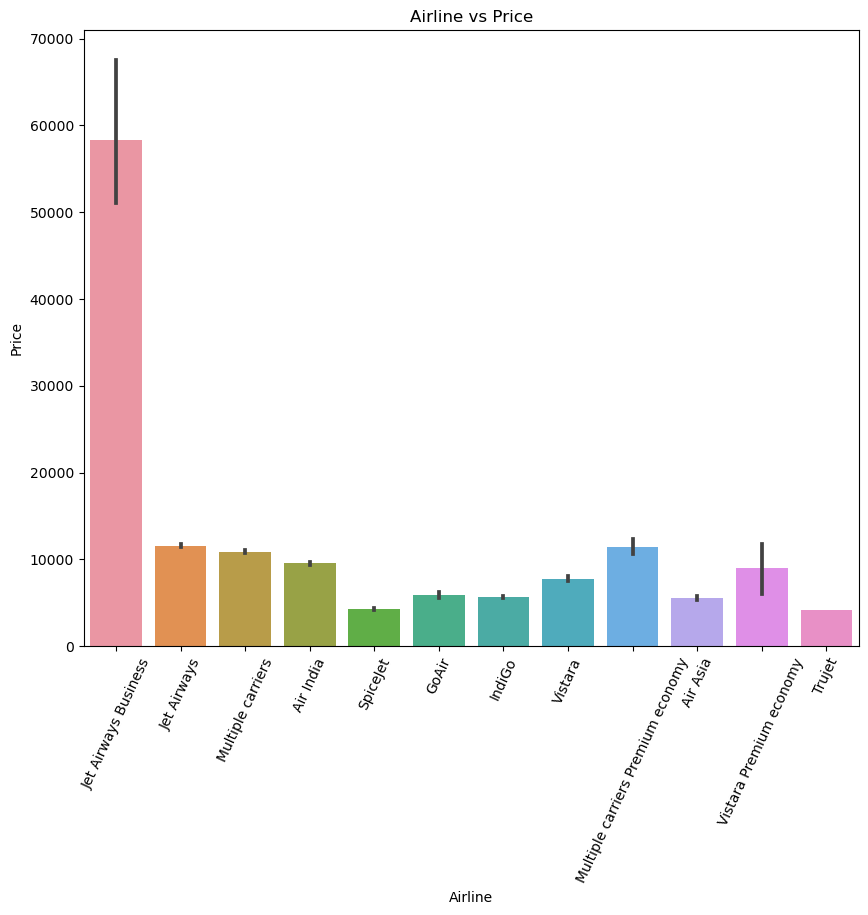

In [398]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x="Airline", y="Price", data=df.sort_values("Price",ascending=False), ax=ax)
plt.xticks(rotation=65)
ax.set_title("Airline vs Price")
ax.set_xlabel("Airline")
ax.set_ylabel("Price")
plt.show()

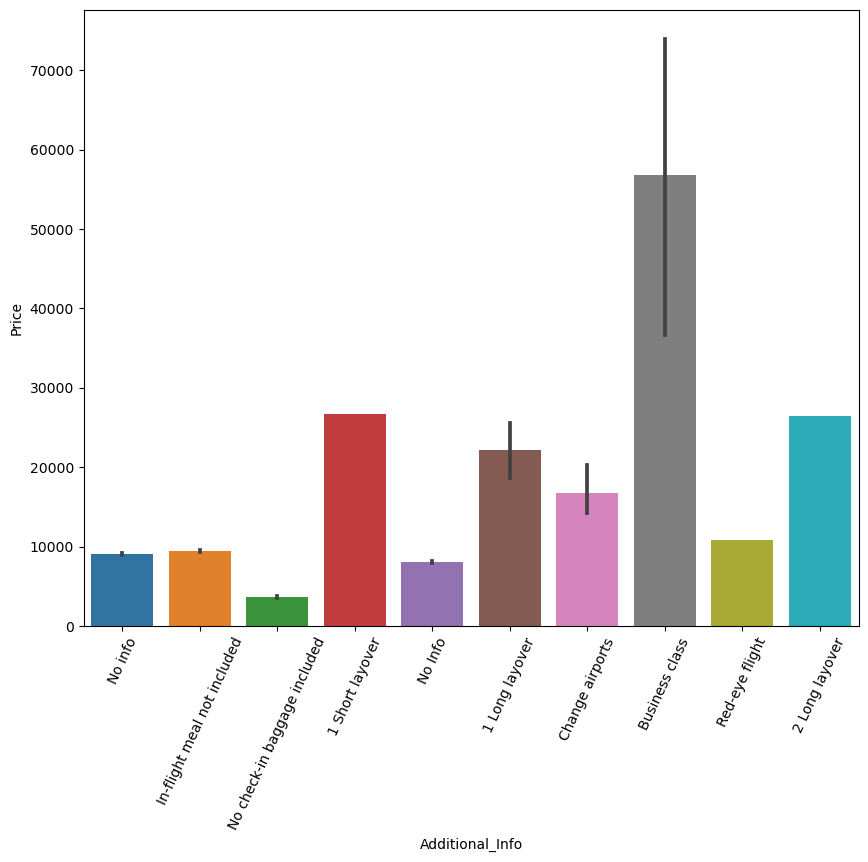

In [399]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(df,x=df["Additional_Info"],y=df["Price"])
plt.xticks(rotation=65)
plt.show()

<Axes: xlabel='Source', ylabel='Price'>

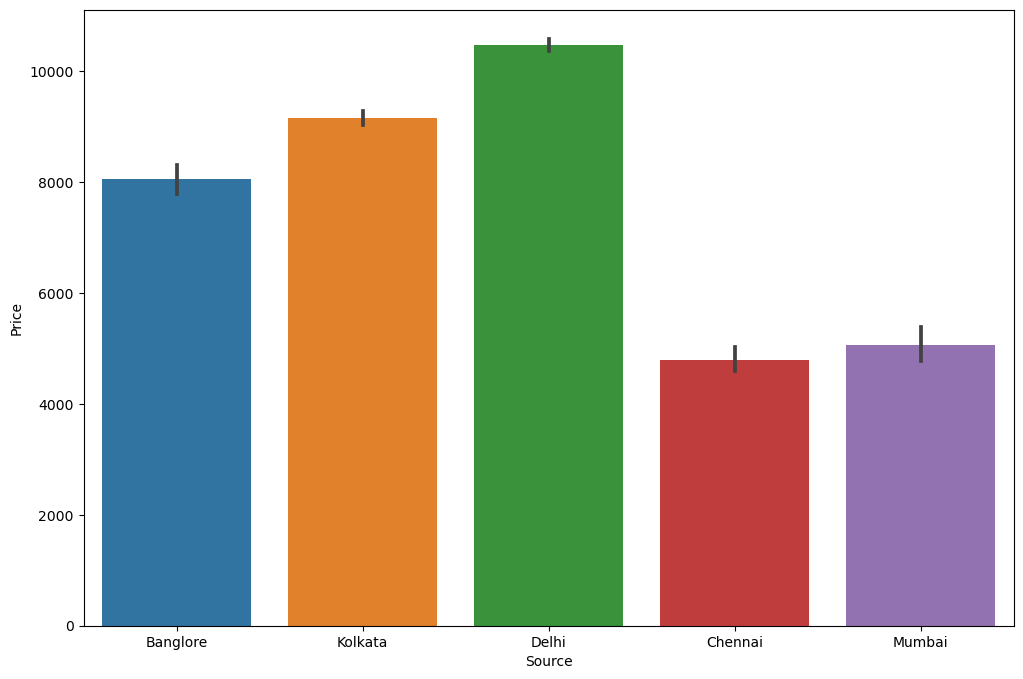

In [400]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(df,x=df["Source"],y=df["Price"])

<Axes: xlabel='Destination', ylabel='Price'>

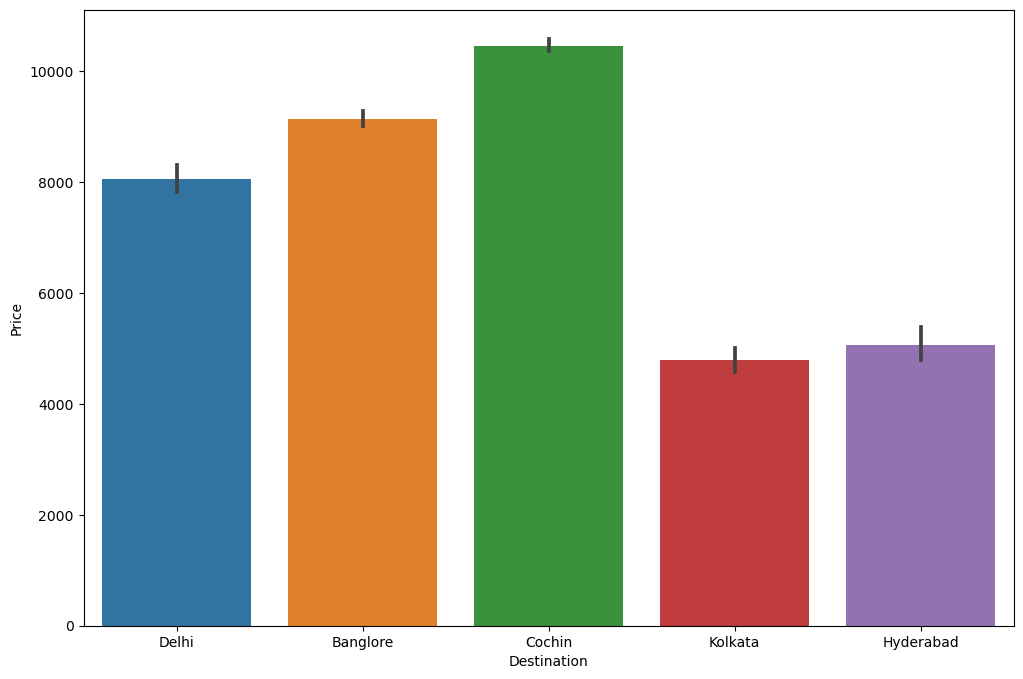

In [401]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(df,x=df["Destination"],y=df["Price"])

C:\Users\user\AppData\Local\Temp\ipykernel_6028\4282895845.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Additional_Info']=="No info"]['Price'],hist=False)
C:\Users\user\AppData\Local\Temp\ipykernel_6028\4282895845.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

<Axes: xlabel='Price', ylabel='Density'>

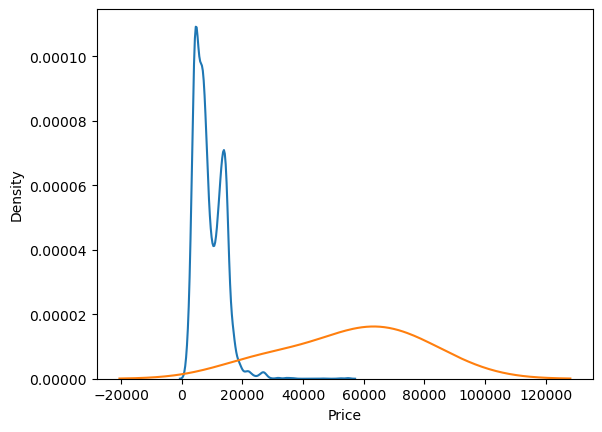

In [402]:
sns.distplot(df[df['Additional_Info']=="No info"]['Price'],hist=False)
sns.distplot(df[df['Additional_Info']=="Business class"]['Price'],hist=False)

<Axes: xlabel='Total_Stops', ylabel='Airline'>

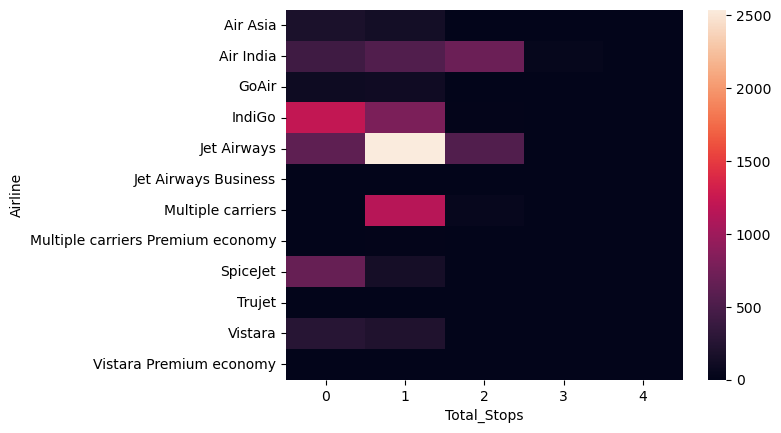

In [403]:
sns.heatmap(pd.crosstab(df["Airline"],df["Total_Stops"]))

In [404]:
df["Total_Stops"].value_counts()

1    5625
0    3452
2    1318
3      43
4       1
Name: Total_Stops, dtype: int64

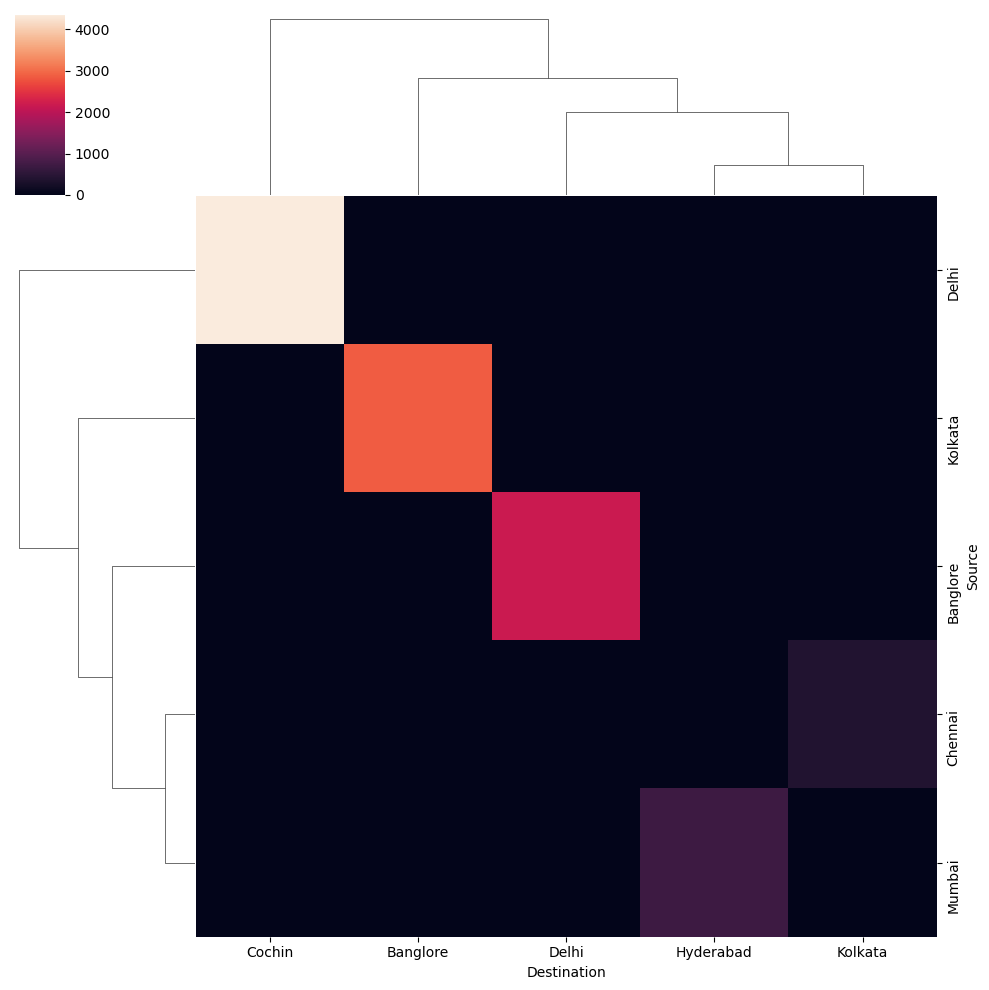

In [405]:
sns.clustermap(pd.crosstab(df['Source'],df['Destination']))

In [406]:
x=df["Journey_Month"]
y=df["Price"]

In [407]:
x

0        3
1        5
2        6
3        5
4        3
        ..
10678    4
10679    4
10680    4
10681    3
10682    5
Name: Journey_Month, Length: 10439, dtype: int64

<Axes: xlabel='Journey_Month', ylabel='Price'>

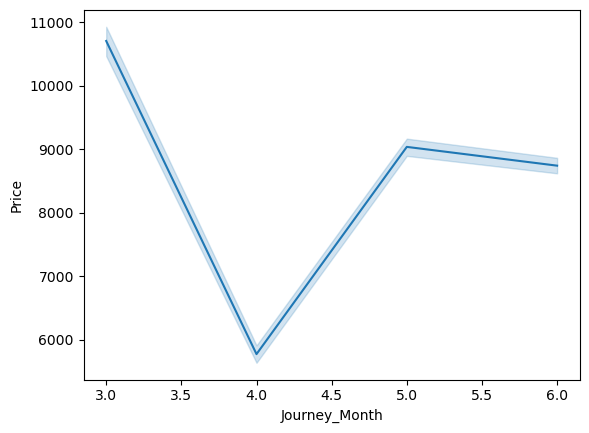

In [408]:
sns.lineplot(x=x,y=y)

In [409]:
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Journey_Year,Journey_Weekday,Dep_Hr,Arrival_Hr,Duration_min
0,IndiGo,Banglore,Delhi,BLR → DEL,0,No info,3897,24,3,2019,Sunday,22,1,170.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,2019,Wednesday,5,13,445.0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,2019,Sunday,9,4,1140.0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,12,5,2019,Sunday,18,23,325.0
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1,No info,13302,1,3,2019,Friday,16,21,285.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,0,No info,4107,9,4,2019,Tuesday,19,22,150.0
10679,Air India,Kolkata,Banglore,CCU → BLR,0,No info,4145,27,4,2019,Saturday,20,23,155.0
10680,Jet Airways,Banglore,Delhi,BLR → DEL,0,No info,7229,27,4,2019,Saturday,8,11,180.0
10681,Vistara,Banglore,Delhi,BLR → DEL,0,No info,12648,1,3,2019,Friday,11,14,160.0


<Axes: xlabel='Journey_day', ylabel='Journey_Month'>

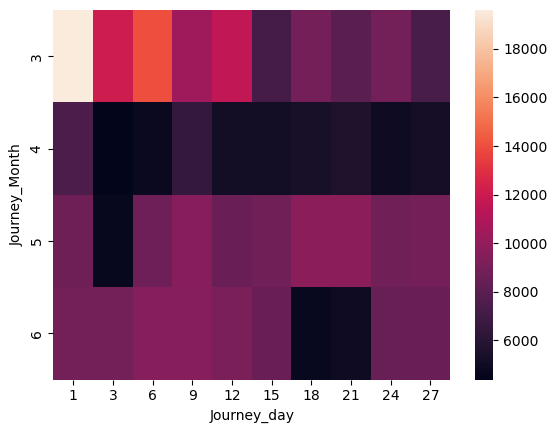

In [410]:
sns.heatmap(df.pivot_table(values='Price',index='Journey_Month',columns='Journey_day'))

##!pip install pandas-profiling

#from pandas_profiling import ProfileReport
#prof = ProfileReport(df)
#prof.to_file(output_file='output.html')

In [411]:
df.sample()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Journey_Year,Journey_Weekday,Dep_Hr,Arrival_Hr,Duration_min
3439,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1,No info,17024,6,3,2019,Wednesday,2,18,995.0


In [412]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = df["Airline"]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [413]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = df[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [414]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = df[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,1,0,0
1,0,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,1,0,0


In [415]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Journey_Weekday = df[["Journey_Weekday"]]

Journey_Weekday= pd.get_dummies(Journey_Weekday, drop_first = True)

Journey_Weekday.head()

,Journey_Weekday_Monday,Journey_Weekday_Saturday,Journey_Weekday_Sunday,Journey_Weekday_Thursday,Journey_Weekday_Tuesday,Journey_Weekday_Wednesday
0,0,0,1,0,0,0
1,0,0,0,0,0,1
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,0,0,0,0


In [416]:
Additional_Info = df[["Additional_Info"]]

Additional_Info= pd.get_dummies(Journey_Weekday, drop_first = True)

Additional_Info.head()

,Journey_Weekday_Monday,Journey_Weekday_Saturday,Journey_Weekday_Sunday,Journey_Weekday_Thursday,Journey_Weekday_Tuesday,Journey_Weekday_Wednesday
0,0,0,1,0,0,0
1,0,0,0,0,0,1
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,0,0,0,0


In [417]:
df.sample()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Journey_Year,Journey_Weekday,Dep_Hr,Arrival_Hr,Duration_min
9538,Jet Airways,Kolkata,Banglore,CCU → BOM → BLR,1,No info,13584,9,5,2019,Thursday,14,18,1690.0


In [418]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

df = pd.concat([df, Airline, Source, Destination,Journey_Weekday,Additional_Info], axis = 1)

In [419]:
df.drop(["Airline", "Source", "Destination","Journey_Weekday","Route","Additional_Info"], axis = 1, inplace = True)

In [420]:
df.sample()

,Total_Stops,Price,Journey_day,Journey_Month,Journey_Year,Dep_Hr,Arrival_Hr,Duration_min,Air India,GoAir,...,Journey_Weekday_Sunday,Journey_Weekday_Thursday,Journey_Weekday_Tuesday,Journey_Weekday_Wednesday,Journey_Weekday_Monday,Journey_Weekday_Saturday,Journey_Weekday_Sunday,Journey_Weekday_Thursday,Journey_Weekday_Tuesday,Journey_Weekday_Wednesday
9065,1,15554,9,5,2019,8,19,660.0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [421]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10439 entries, 0 to 10682
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Total_Stops                        10439 non-null  int32  
 1   Price                              10439 non-null  int64  
 2   Journey_day                        10439 non-null  int64  
 3   Journey_Month                      10439 non-null  int64  
 4   Journey_Year                       10439 non-null  int64  
 5   Dep_Hr                             10439 non-null  int32  
 6   Arrival_Hr                         10439 non-null  int32  
 7   Duration_min                       10439 non-null  float64
 8   Air India                          10439 non-null  uint8  
 9   GoAir                              10439 non-null  uint8  
 10  IndiGo                             10439 non-null  uint8  
 11  Jet Airways                        10439 non-null  uin

In [422]:
from sklearn.model_selection import train_test_split

In [423]:
x= df.loc[:,df.columns!='Price']
x

,Total_Stops,Journey_day,Journey_Month,Journey_Year,Dep_Hr,Arrival_Hr,Duration_min,Air India,GoAir,IndiGo,...,Journey_Weekday_Sunday,Journey_Weekday_Thursday,Journey_Weekday_Tuesday,Journey_Weekday_Wednesday,Journey_Weekday_Monday,Journey_Weekday_Saturday,Journey_Weekday_Sunday,Journey_Weekday_Thursday,Journey_Weekday_Tuesday,Journey_Weekday_Wednesday
0,0,24,3,2019,22,1,170.0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
1,2,1,5,2019,5,13,445.0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,2,9,6,2019,9,4,1140.0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,12,5,2019,18,23,325.0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
4,1,1,3,2019,16,21,285.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9,4,2019,19,22,150.0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
10679,0,27,4,2019,20,23,155.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
10680,0,27,4,2019,8,11,180.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10681,0,1,3,2019,11,14,160.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [424]:
y=df.loc[:, "Price"]
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10439, dtype: int64

In [425]:
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=40, test_size = 0.4)

In [426]:
X_train

,Total_Stops,Journey_day,Journey_Month,Journey_Year,Dep_Hr,Arrival_Hr,Duration_min,Air India,GoAir,IndiGo,...,Journey_Weekday_Sunday,Journey_Weekday_Thursday,Journey_Weekday_Tuesday,Journey_Weekday_Wednesday,Journey_Weekday_Monday,Journey_Weekday_Saturday,Journey_Weekday_Sunday,Journey_Weekday_Thursday,Journey_Weekday_Tuesday,Journey_Weekday_Wednesday
10368,1,21,3,2019,22,7,530.0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
7819,0,15,3,2019,8,10,135.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10150,1,24,5,2019,20,8,735.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8971,0,24,6,2019,17,19,150.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4719,1,18,5,2019,18,16,1285.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7960,2,27,6,2019,17,19,1560.0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
3636,1,9,5,2019,13,22,555.0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
6034,0,9,5,2019,5,7,90.0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
5494,0,3,6,2019,4,7,155.0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [427]:
X_test

,Total_Stops,Journey_day,Journey_Month,Journey_Year,Dep_Hr,Arrival_Hr,Duration_min,Air India,GoAir,IndiGo,...,Journey_Weekday_Sunday,Journey_Weekday_Thursday,Journey_Weekday_Tuesday,Journey_Weekday_Wednesday,Journey_Weekday_Monday,Journey_Weekday_Saturday,Journey_Weekday_Sunday,Journey_Weekday_Thursday,Journey_Weekday_Tuesday,Journey_Weekday_Wednesday
4509,0,1,6,2019,5,7,145.0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
9825,0,27,5,2019,22,0,140.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
10289,1,21,5,2019,20,20,1440.0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
8614,1,1,5,2019,8,18,590.0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
10216,1,3,3,2019,6,11,310.0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7306,2,3,3,2019,5,19,2295.0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
986,0,21,6,2019,11,13,135.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9113,1,21,5,2019,8,20,740.0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6718,2,12,5,2019,5,20,875.0,1,0,0,...,1,0,0,0,0,0,1,0,0,0


In [428]:
y_train

10368     7045
7819      6300
10150    13731
8971      3841
4719     10844
         ...  
7960     12199
3636      8888
6034      2017
5494      5224
7723      3543
Name: Price, Length: 6263, dtype: int64

In [429]:
from sklearn.preprocessing import StandardScaler

In [430]:
scalar=StandardScaler()

In [431]:
scalar.fit(X_train)

StandardScaler()

In [432]:
X_train_scaled = scalar.transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [433]:
X_train_scaled.mean()

-4.030491076565524e-19

In [434]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [435]:
np.round(X_train.describe(),1)

,Total_Stops,Journey_day,Journey_Month,Journey_Year,Dep_Hr,Arrival_Hr,Duration_min,Air India,GoAir,IndiGo,...,Journey_Weekday_Sunday,Journey_Weekday_Thursday,Journey_Weekday_Tuesday,Journey_Weekday_Wednesday,Journey_Weekday_Monday,Journey_Weekday_Saturday,Journey_Weekday_Sunday,Journey_Weekday_Thursday,Journey_Weekday_Tuesday,Journey_Weekday_Wednesday
count,6263.0,6263.0,6263.0,6263.0,6263.0,6263.0,6263.0,6263.0,6263.0,6263.0,...,6263.0,6263.0,6263.0,6263.0,6263.0,6263.0,6263.0,6263.0,6263.0,6263.0
mean,0.8,13.4,4.7,2019.0,12.5,13.4,634.7,0.2,0.0,0.2,...,0.1,0.2,0.1,0.2,0.2,0.1,0.1,0.2,0.1,0.2
std,0.7,8.5,1.2,0.0,5.7,6.9,498.7,0.4,0.1,0.4,...,0.3,0.4,0.3,0.4,0.4,0.4,0.3,0.4,0.3,0.4
min,0.0,1.0,3.0,2019.0,0.0,0.0,75.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,6.0,3.0,2019.0,8.0,8.0,170.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,1.0,12.0,5.0,2019.0,11.0,14.0,520.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.0,21.0,6.0,2019.0,18.0,19.0,915.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,3.0,27.0,6.0,2019.0,23.0,23.0,2860.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [436]:
np.round(X_train_scaled.describe(), 1)

,Total_Stops,Journey_day,Journey_Month,Journey_Year,Dep_Hr,Arrival_Hr,Duration_min,Air India,GoAir,IndiGo,...,Journey_Weekday_Sunday,Journey_Weekday_Thursday,Journey_Weekday_Tuesday,Journey_Weekday_Wednesday,Journey_Weekday_Monday,Journey_Weekday_Saturday,Journey_Weekday_Sunday,Journey_Weekday_Thursday,Journey_Weekday_Tuesday,Journey_Weekday_Wednesday
count,6263.0,6263.0,6263.0,6263.0,6263.0,6263.0,6263.0,6263.0,6263.0,6263.0,...,6263.0,6263.0,6263.0,6263.0,6263.0,6263.0,6263.0,6263.0,6263.0,6263.0
mean,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0
std,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.2,-1.5,-1.5,0.0,-2.2,-1.9,-1.1,-0.4,-0.1,-0.5,...,-0.4,-0.5,-0.3,-0.5,-0.5,-0.4,-0.4,-0.5,-0.3,-0.5
25%,-1.2,-0.9,-1.5,0.0,-0.8,-0.8,-0.9,-0.4,-0.1,-0.5,...,-0.4,-0.5,-0.3,-0.5,-0.5,-0.4,-0.4,-0.5,-0.3,-0.5
50%,0.3,-0.2,0.3,0.0,-0.3,0.1,-0.2,-0.4,-0.1,-0.5,...,-0.4,-0.5,-0.3,-0.5,-0.5,-0.4,-0.4,-0.5,-0.3,-0.5
75%,0.3,0.9,1.1,0.0,1.0,0.8,0.6,-0.4,-0.1,-0.5,...,-0.4,-0.5,-0.3,-0.5,-0.5,-0.4,-0.4,-0.5,-0.3,-0.5
max,3.3,1.6,1.1,0.0,1.8,1.4,4.5,2.2,7.5,2.1,...,2.5,2.2,3.3,2.0,2.2,2.4,2.5,2.2,3.3,2.0


In [437]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [438]:
y_pred = reg_rf.predict(X_test)

In [439]:
reg_rf.score(X_train, y_train)

0.9569538106682046

In [440]:
reg_rf.score(X_test, y_test)

0.8244793263599822

C:\Users\user\AppData\Local\Temp\ipykernel_6028\3453123835.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


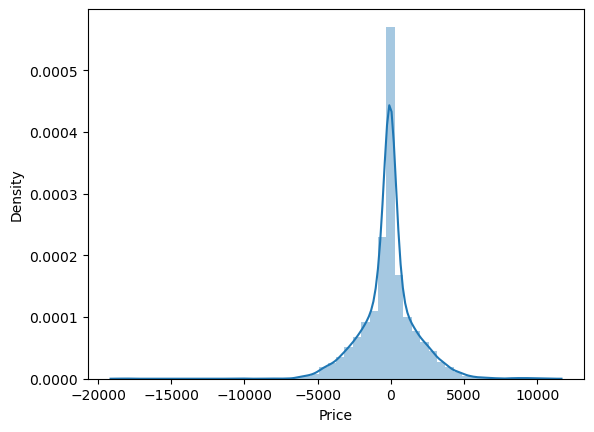

In [441]:
sns.distplot(y_test-y_pred)
plt.show()

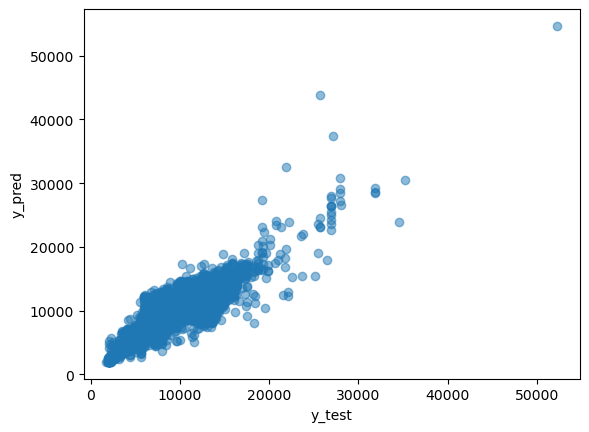

In [442]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [443]:
from sklearn import metrics

In [444]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1208.6832385625894
MSE: 3394281.819286073
RMSE: 1842.3576795199333


In [445]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(y)-min(y))

0.026887077025966846

In [446]:
metrics.r2_score(y_test, y_pred)

0.8244793263599822

In [447]:
model = rf_random.predict(X_test)

C:\Users\user\AppData\Local\Temp\ipykernel_6028\1524194035.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-model)


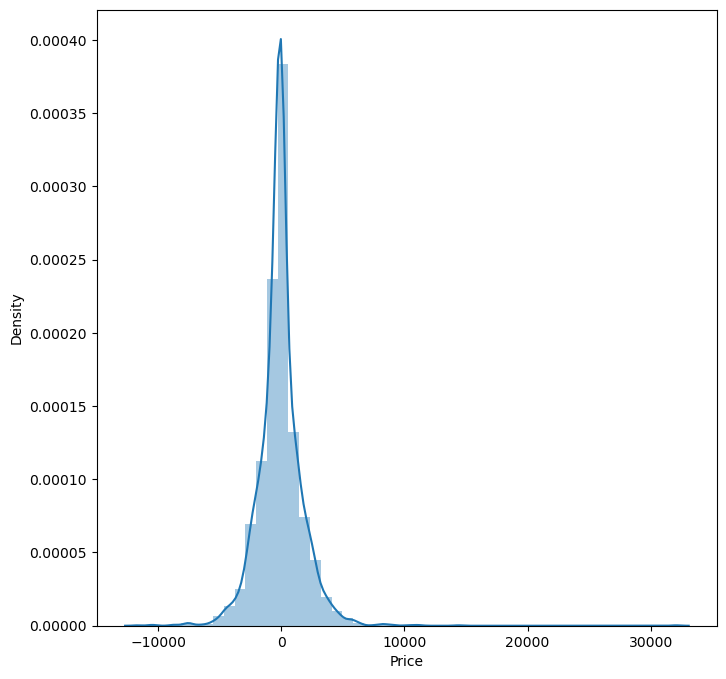

In [448]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-model)
plt.show()

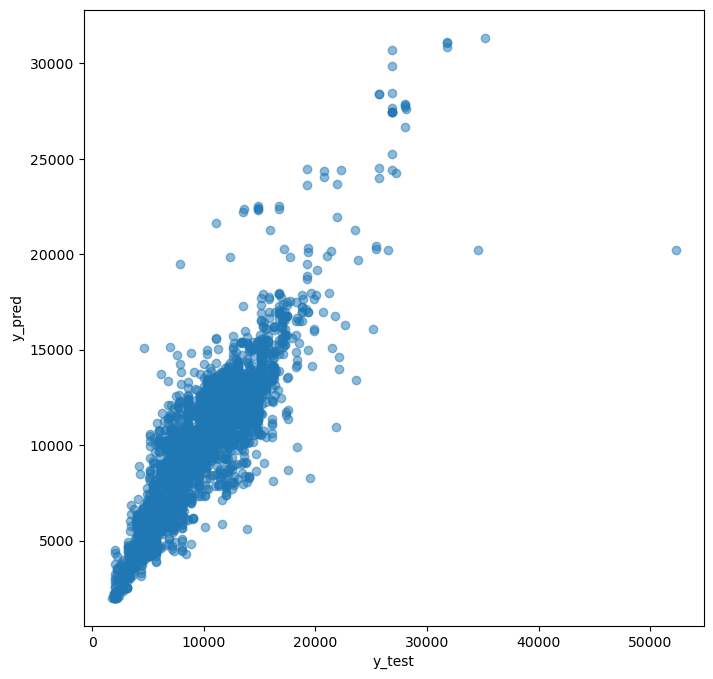

In [449]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, model, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [450]:
print('MAE:', metrics.mean_absolute_error(y_test, model))
print('MSE:', metrics.mean_squared_error(y_test, model))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, model)))

MAE: 1190.995393076873
MSE: 3326457.0872818073
RMSE: 1823.8577486420938


In [451]:
#Save the model to reuse it again
import pickle
# open a file, where you ant to store the data
file = open('Flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [452]:
model = open('Flight_rf.pkl','rb')
forest = pickle.load(model)

In [453]:
y_prediction = forest.predict(X_test)

In [454]:
metrics.r2_score(y_test, y_prediction)

0.8279865904248578